In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
data = pd.read_csv('Dataset/NEW/3 MNIST/mnist_784_csv.csv')

In [3]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [9]:
# Separate features and labels
x = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column

In [10]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

In [12]:
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(56000, 28, 28, 1)
(56000, 1)
(14000, 28, 28, 1)
(14000, 1)


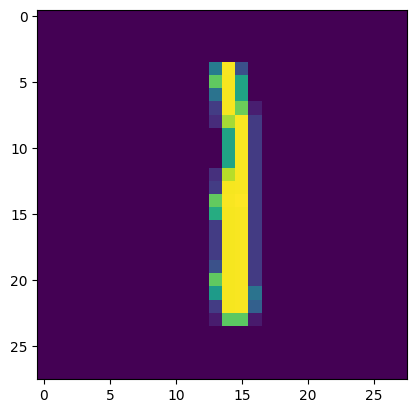

[1]


In [13]:
plt.imshow(x_train[90])
plt.show()

print(y_train[90])

In [14]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
print(x_train.shape, x_test.shape)

(56000, 28, 28, 1) (14000, 28, 28, 1)


In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(50, activation='relu', name='L1'),
    keras.layers.Dense(50, activation='relu', name='L2'),
    keras.layers.Dense(10, activation='softmax', name='L3')
])

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6208 - loss: 1.2228 - val_accuracy: 0.9002 - val_loss: 0.3536
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9067 - loss: 0.3293 - val_accuracy: 0.9169 - val_loss: 0.2878
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9210 - loss: 0.2697 - val_accuracy: 0.9290 - val_loss: 0.2515
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9323 - loss: 0.2321 - val_accuracy: 0.9297 - val_loss: 0.2388
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9395 - loss: 0.2066 - val_accuracy: 0.9418 - val_loss: 0.2079
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9467 - loss: 0.1850 - val_accuracy: 0.9442 - val_loss: 0.1965
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9520 - loss: 0.1673 - val_accuracy: 0.9479 - val_loss: 0.1821
Epoch 8/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9551 - loss: 0.1541 - 

<Axes: >

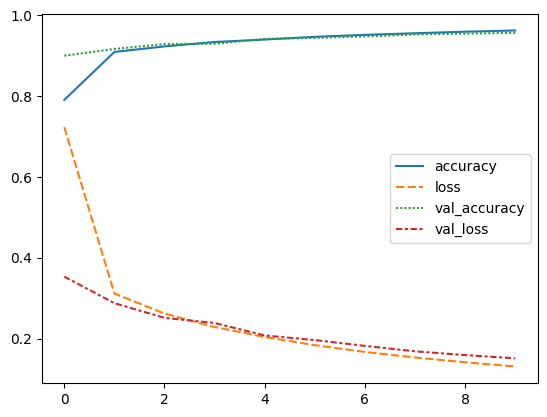

In [20]:
import seaborn as sns
sns.lineplot(model.history.history)

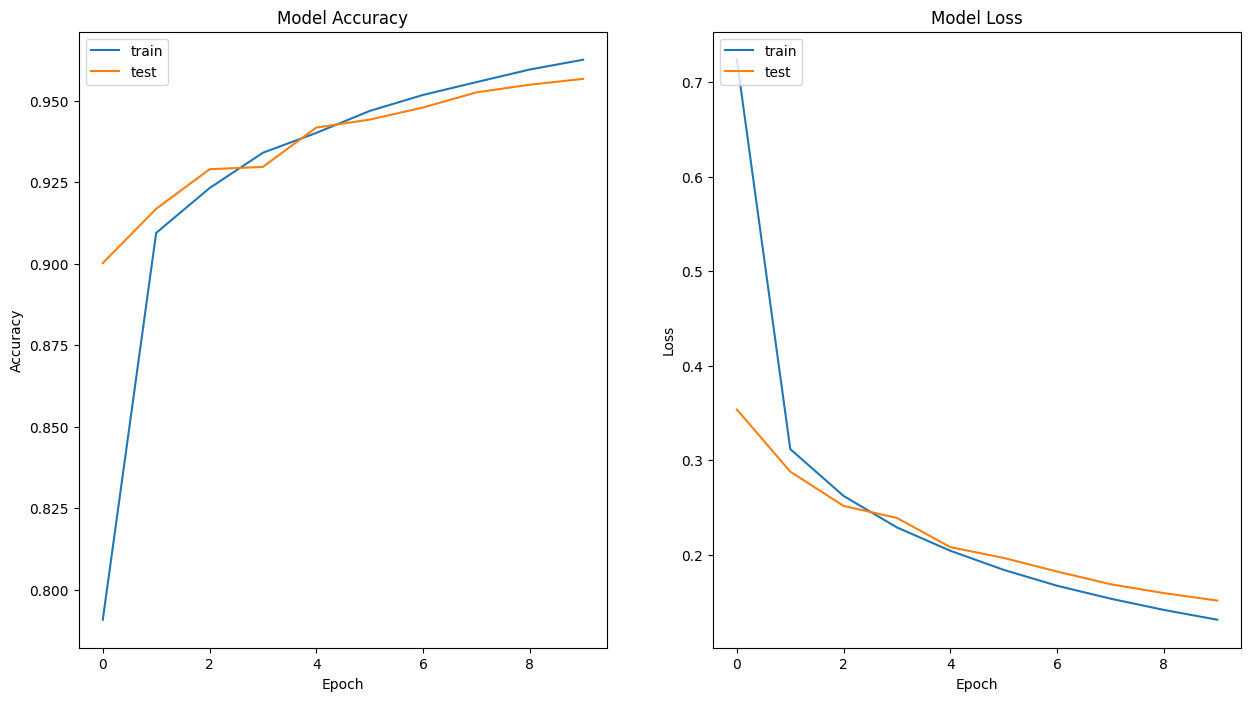

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 8])

# Summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

# Summarize history for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1473


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


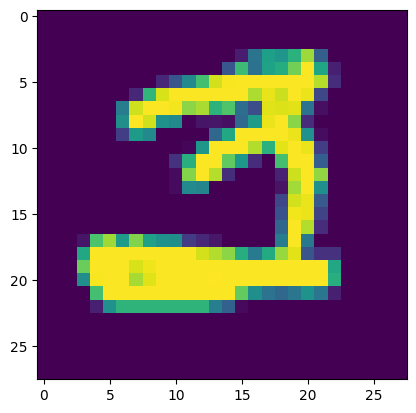

3


In [23]:
predicted_value = model.predict(x_test)
plt.imshow(x_test[1111])
plt.show()
print(np.argmax(predicted_value[1111], axis=0))

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

438/438 - 1s - 2ms/step - accuracy: 0.9567 - loss: 0.1514
Test Loss: 0.15143761038780212
Test Accuracy: 0.9567142724990845
